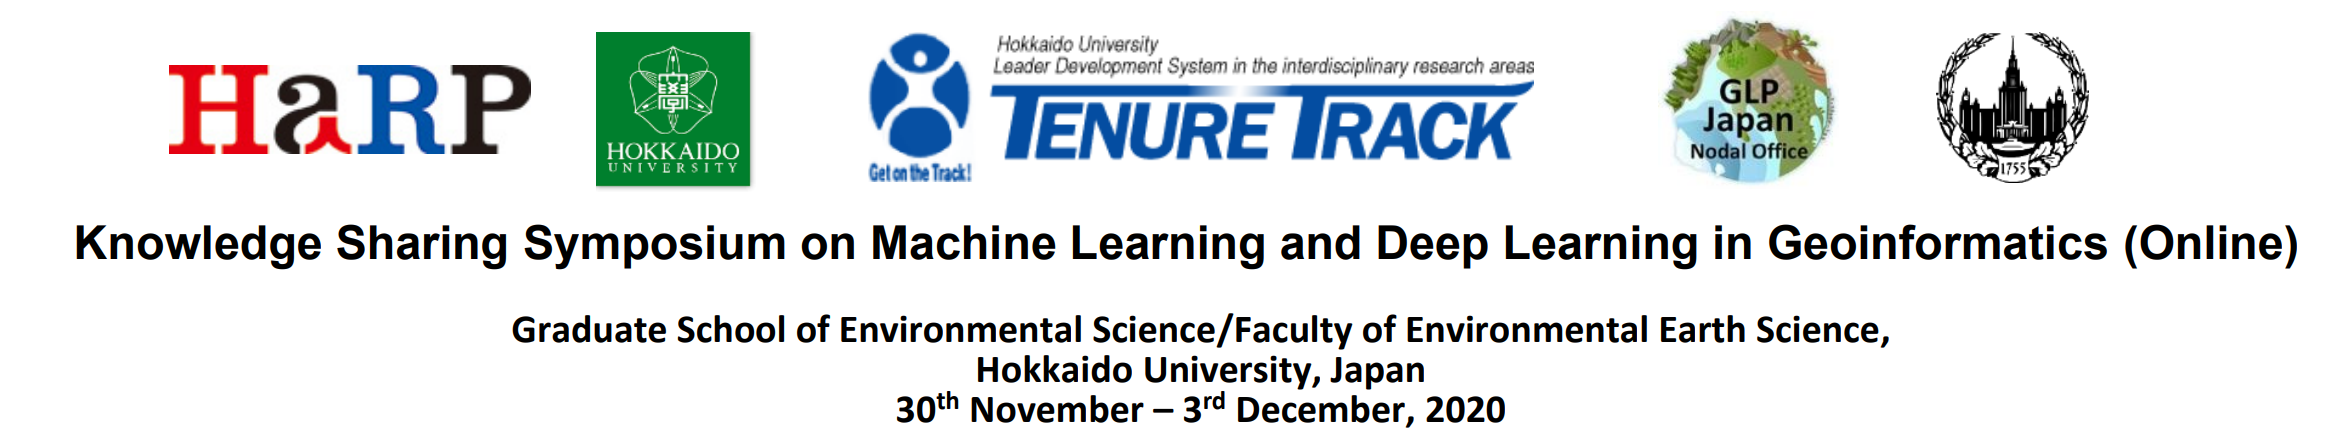

# Introduction to Google Colab for Machine Learning

**Deepak Keshwani**, AI Researcher, Fujifilm Corporation

**Fujifilm is a Total Healthcare Company!**

* **Prevention**: Skin care products (Astalift), Supplements
* **Diagnosis**: Medical Equipment (X-ray, Ultrasound, Endoscope etc.),  **Medical Diagnostics related softwares (My division)**
* **Treatment**: Avigan for COVID is one exmple

**Medical Imaging AI**

* Support doctors in identifying abnoralities from medical images
* Introductory video: https://www.youtube.com/watch?v=Y7sImmYTHaQ

**Note**: I'm presenting today's session at my Individual capacity. The views and contents are not of my employer.


# Today's topics

1. Introduction to Google Colab

2. MNIST Classification: Deep Learning Hello World


<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

# What is Colaboratory?

Google Colab is an Executable document, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Think as if you've been provided a brand new PC by Google with all important libraries pre-installed. The display of that PC is Google Chrome


# Intro: Run simple shell commands

In [ ]:
!ls # list command lists the files and folders in current directory 

In [ ]:
!pwd # show current directory

In [15]:
!cd ../content/ # change the directory

# Intro: Run some python code



In [26]:
import numpy as np

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]


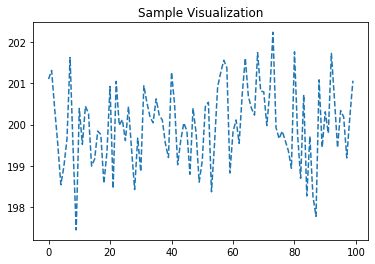

In [29]:
from matplotlib import pyplot as plt

plt.plot(x, ys, '--')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

# Intro: Uploading files from local PC (Local PC -> Google server)

In [30]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Intro: Downloading files to local PC (Google server -> local PC)

In [32]:
with open('example.txt', 'w') as f:
  f.write('some content')

In [33]:
from google.colab import files
files.download('example.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# MNIST classification: Deep Learning Hello World!
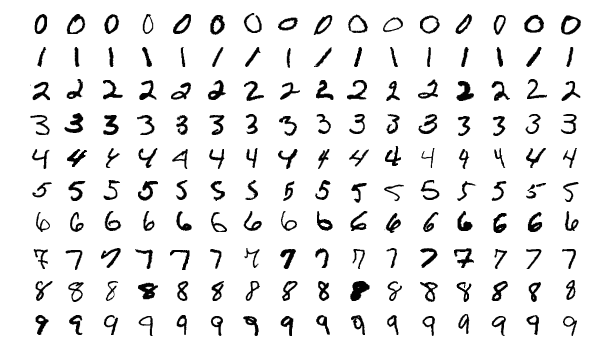



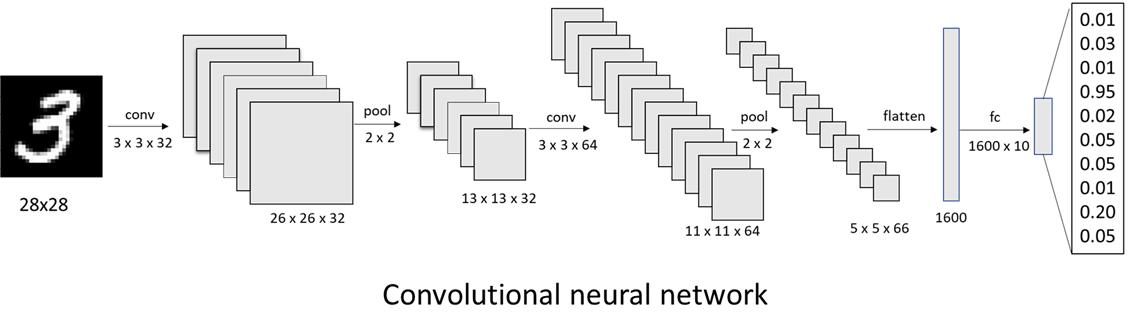

# Deep Learning steps
* Download the data
* Analyze the data
* Prepare the data for deep learning
* Define the model
* Train the model
* Validate the model
* Analyze the results



# Download the Data

In [1]:
import numpy as np # important library for scientific computing
from tensorflow import keras # Deep learning library
from tensorflow.keras import layers # Deep learning library
import matplotlib.pyplot as plt # Visualization library

In [17]:
# Since this is a standard problem, the dataset can be downloaded using keras library itself
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Analyze the data

In [21]:
np.shape(x_train)

(60000, 28, 28)

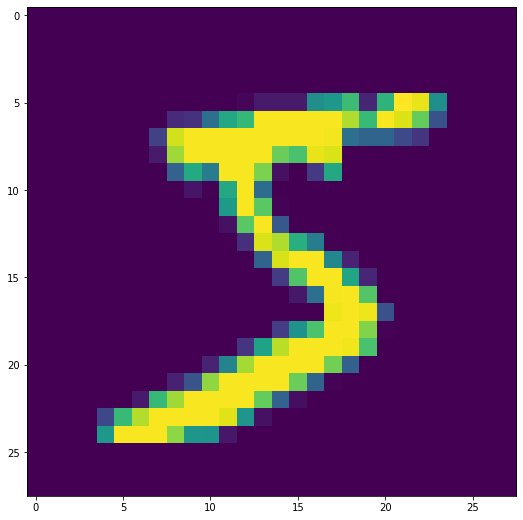

In [26]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
plt.imshow(x_train[0])

In [25]:
# compact way to print a matrix - tag the source
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[0])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    3   18   18   18  126  136  175   26  166  255  247  127  0  0  0  0  
0  0  0  0    0    0    0    0   30   36   94  154  170  253  253  253  253  253  225  172  253  242  195   64  0  0  0  0  
0  0  0  0    0    0    0   49  238  253  253  253  253  253  253  253  253  251   93   82   82   56   39    0  0  0  0  0  


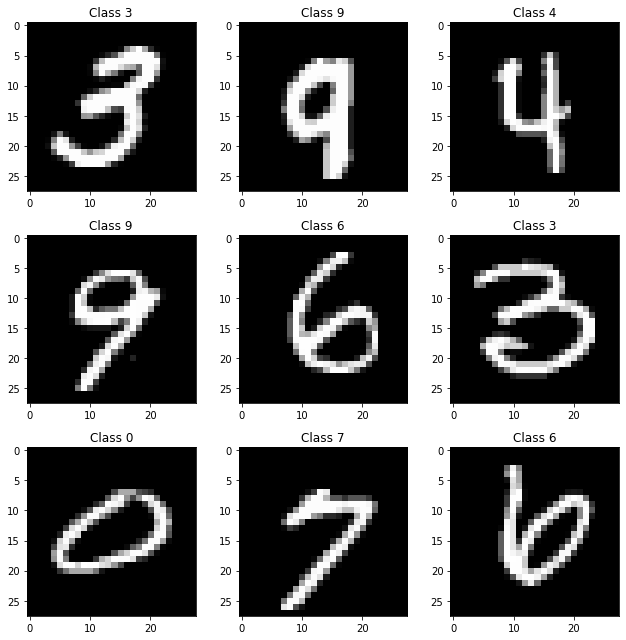

In [27]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

# Prepare the Data

In [4]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Define the model

In [28]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

# Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Validate the model

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023344088345766068
Test accuracy: 0.9915000200271606


# Analyze the results

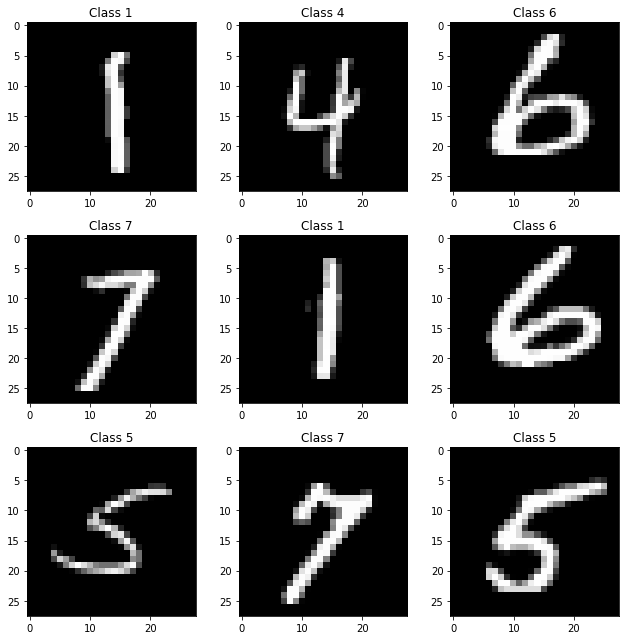

In [20]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(x_test))
    plt.imshow(x_test[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(np.argmax(model.predict(np.reshape(x_test[num],[1,28,28,1])))))
    
plt.tight_layout()